<font size="+3.8">Scanpy single-cell pre-processing</font>  
<font size="+1.5"></font>  

Aim: Preprocess mouse brain single-cell data from Ximerakis 2019 Nat Neuroscience

In [1]:
from datetime import date
date.today().strftime('%d/%m/%Y')

'09/11/2023'

In [2]:
import os
os.getlogin()

'sfrerich'

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import platform
import random
import seaborn as sns

In [4]:
os.environ['CONDA_DEFAULT_ENV'] # conda env

'scanpy'

In [5]:
platform.platform()

'Windows-10-10.0.14393-SP0'

In [6]:
sc.settings.verbosity = 3

In [7]:
main_dir='/run/user/1000/gvfs/smb-share:server=138.245.4.35,share=bd-dichgans/SF' # Linux

In [8]:
main_dir='\\\isdsynnas.srv.med.uni-muenchen.de\BD-Dichgans\SF' # Win

# Load data

Downloaded from: https://singlecell.broadinstitute.org/single_cell/study/SCP263/aging-mouse-brain 06/03/2023

In [9]:
ad = sc.read_text(main_dir+"\\P06_vasc_scRNAseq\Ximerakis2019\\expression_Aging_mouse_brain_portal_data_updated.txt").T
ad

AnnData object with n_obs × n_vars = 37069 × 14699

In [10]:
ad.obs.head()

""
Aging_mouse_brain_portal_data_6_AAACCTGAGGCCCTTG
Aging_mouse_brain_portal_data_6_AAACGGGAGAGACGAA
Aging_mouse_brain_portal_data_6_AAAGTAGCAACGATCT
Aging_mouse_brain_portal_data_6_AACCGCGCAACAACCT
Aging_mouse_brain_portal_data_6_AACTCCCAGTACGTAA


In [11]:
ad.var_names

Index(['Sox17', 'Mrpl15', 'Lypla1', 'Tcea1', 'Rgs20', 'Atp6v1h', 'Oprk1',
       'Rb1cc1', '4732440D04Rik', 'St18',
       ...
       'mt-Nd3', 'mt-Nd4l', 'mt-Nd4', 'mt-Nd5', 'mt-Nd6', 'mt-Cytb', 'Vamp7',
       'AC168977.1', 'PISD', 'DHRSX'],
      dtype='object', length=14699)

In [12]:
# add metadata
meta = pd.read_csv(main_dir+"\\P06_vasc_scRNAseq\Ximerakis2019\\meta_Aging_mouse_brain_portal_data.txt", sep="\t", skiprows=[1])
meta.head()

,NAME,cell_type,cell_type_by_age,cell_class,cell_class_by_age,all_cells_by_age,nGene,nUMI
0,Aging_mouse_brain_portal_data_6_AAACCTGAGGCCCTTG,MG,MG_2-3mo,Immune_cells,Immune_cells_2-3mo,2-3mo,1546,3546
1,Aging_mouse_brain_portal_data_6_AAACGGGAGAGACGAA,MG,MG_2-3mo,Immune_cells,Immune_cells_2-3mo,2-3mo,734,1589
2,Aging_mouse_brain_portal_data_6_AAAGTAGCAACGATCT,MG,MG_2-3mo,Immune_cells,Immune_cells_2-3mo,2-3mo,456,1129
3,Aging_mouse_brain_portal_data_6_AACCGCGCAACAACCT,MG,MG_2-3mo,Immune_cells,Immune_cells_2-3mo,2-3mo,1236,2697
4,Aging_mouse_brain_portal_data_6_AACTCCCAGTACGTAA,MG,MG_2-3mo,Immune_cells,Immune_cells_2-3mo,2-3mo,622,1115


In [13]:
assert all(ad.obs.index == meta.NAME)
ad.obs = meta
ad

AnnData object with n_obs × n_vars = 37069 × 14699
    obs: 'NAME', 'cell_type', 'cell_type_by_age', 'cell_class', 'cell_class_by_age', 'all_cells_by_age', 'nGene', 'nUMI'

In [14]:
pd.value_counts(ad.obs["cell_class"])

cell_class
Oligodendrocyte_lineage    15463
Astrocyte_lineage           7097
Neuronal_lineage            5773
Immune_cells                4448
Vasculature_cells           3884
Ependymal_cells              404
Name: count, dtype: int64

In [15]:
pd.value_counts(ad.obs["cell_type"])

cell_type
OLG              12384
ASC               6747
NEUR_mature       5135
MG                3910
EC                2413
OPC               2187
OEG                892
PC                 735
NendC              394
MAC                377
ABC                307
EPC                274
VSMC               243
ARP                184
NSC                166
NEUR_immature      162
VLMC               105
CPC                 89
NRP                 82
Hb_VC               81
MNC                 77
DC                  55
NEUT                29
TNC                 29
HypEPC              12
Name: count, dtype: int64

In [16]:
ad.obs["age"] = ad.obs["all_cells_by_age"]
pd.value_counts(ad.obs["age"])

age
21-22mo    21041
2-3mo      16028
Name: count, dtype: int64

In [17]:
pd.crosstab(ad.obs["cell_type"], ad.obs["cell_class"])

cell_class,Astrocyte_lineage,Ependymal_cells,Immune_cells,Neuronal_lineage,Oligodendrocyte_lineage,Vasculature_cells
cell_type,,,,,,
ABC,0,0,0,0,0,307
ARP,184,0,0,0,0,0
ASC,6747,0,0,0,0,0
CPC,0,89,0,0,0,0
DC,0,0,55,0,0,0
EC,0,0,0,0,0,2413
EPC,0,274,0,0,0,0
Hb_VC,0,0,0,0,0,81
HypEPC,0,12,0,0,0,0


In [18]:
# also see website

In [19]:
new_names = {
    'Endothelial cells': {'EC'},
    'Oligos': {'OLG'},
    'Olfactory ensheathing glia': {'OEG'},
    'Astrocytes': {'ARP','ASC'},
    'Pericytes': {'PC'},
    'SMCs': {'VSMC'},
    'Neurons': {'NRP','NEUR_immature','NEUR_mature','NendC'},
    'OPCs': {'OPC'},
    'VLMCs': {'VLMC','ABC'},
    'Microglia/Macrophages': {'MG','MAC'},
    'Neural stem cells': {'NSC'},
    'Ependymal cells': {'EPC'},
    'Hypendymal cells': {'HypEPC','TNC'},
    'Choroid plexus epithelial cells':{'CPC'},
    'Immune_Other': {'MNC','DC','NEUT'},
    'Hemoglobin-expressing vascular cells':{'Hb_VC'},
}
result = {}
for key, value in new_names.items():
    for elem in value:
        result[(elem)] = key
new_cluster_names = dict(sorted(result.items()))
print(new_cluster_names)

{'ABC': 'VLMCs', 'ARP': 'Astrocytes', 'ASC': 'Astrocytes', 'CPC': 'Choroid plexus epithelial cells', 'DC': 'Immune_Other', 'EC': 'Endothelial cells', 'EPC': 'Ependymal cells', 'Hb_VC': 'Hemoglobin-expressing vascular cells', 'HypEPC': 'Hypendymal cells', 'MAC': 'Microglia/Macrophages', 'MG': 'Microglia/Macrophages', 'MNC': 'Immune_Other', 'NEUR_immature': 'Neurons', 'NEUR_mature': 'Neurons', 'NEUT': 'Immune_Other', 'NRP': 'Neurons', 'NSC': 'Neural stem cells', 'NendC': 'Neurons', 'OEG': 'Olfactory ensheathing glia', 'OLG': 'Oligos', 'OPC': 'OPCs', 'PC': 'Pericytes', 'TNC': 'Hypendymal cells', 'VLMC': 'VLMCs', 'VSMC': 'SMCs'}


In [20]:
ad.obs['clusters'] = (
    ad.obs['cell_type']
    .map(new_cluster_names)
    .astype('category')
)

In [21]:
pd.value_counts(ad.obs["clusters"])

clusters
Oligos                                  12384
Astrocytes                               6931
Neurons                                  5773
Microglia/Macrophages                    4287
Endothelial cells                        2413
OPCs                                     2187
Olfactory ensheathing glia                892
Pericytes                                 735
VLMCs                                     412
Ependymal cells                           274
SMCs                                      243
Neural stem cells                         166
Immune_Other                              161
Choroid plexus epithelial cells            89
Hemoglobin-expressing vascular cells       81
Hypendymal cells                           41
Name: count, dtype: int64

D:\Programme\Anaconda\envs\scanpy\Lib\site-packages\scanpy\plotting\_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


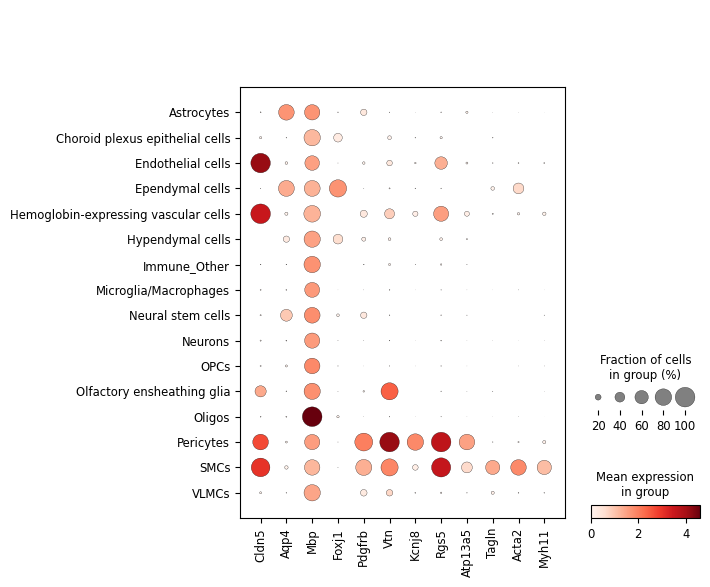

In [22]:
sc.pl.dotplot(ad, var_names=['Cldn5',"Aqp4","Mbp",'Foxj1','Pdgfrb','Vtn','Kcnj8','Rgs5','Atp13a5','Tagln','Acta2','Myh11'], groupby="clusters", swap_axes=False);

Last 3 cols are SMC markers

Check if data is normalized:

In [23]:
ad.layers

Layers with keys: 

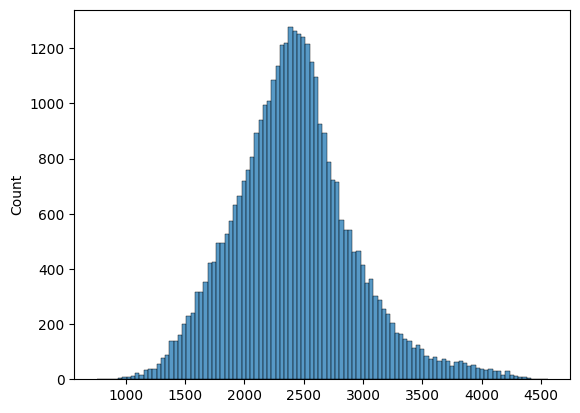

In [24]:
sns.histplot(ad.X.sum(1), kde=False)
plt.show()

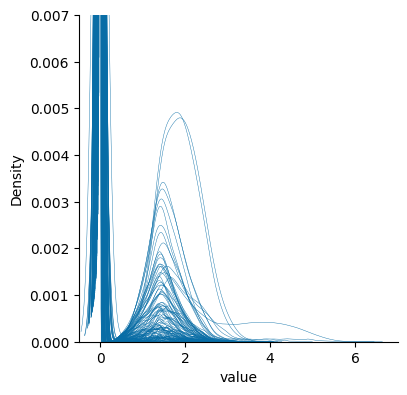

In [25]:
# show expression of 100 random genes (across all spots)
random_genes=random.sample(range(0, ad.X.shape[1]), 100)
adata_sub = ad[:,random_genes]
exp=pd.DataFrame(np.matrix(adata_sub.X))
pl1=sns.displot(data=pd.melt(exp),x='value',height=4,hue='variable',kind="kde",warn_singular=False,legend=False,palette=list(np.repeat('#086da6',100)), lw=0.3) # genes with 0 expression are excluded
pl1.set(xlim=(-0.5, 7),ylim=(0,0.007));
plt.show()

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13092\3027945264.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)))


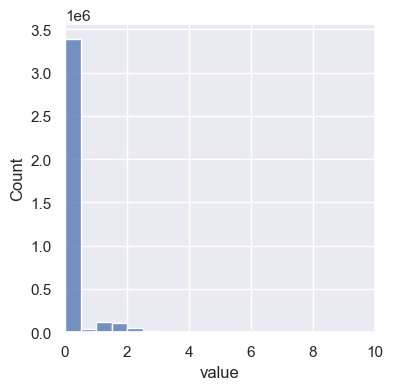

In [26]:
sns.set(rc={'figure.figsize':(4,4)})
pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)))
pl.set(xlim=(0, 10));
sns.set_style("ticks")
plt.show()

In [27]:
np.matrix(adata_sub.X)

matrix([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         1.9869515],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]], dtype=float32)

Data seems to be normalized

In [28]:
ad.layers["normalized"] = ad.X.copy() # save normalized + log-transformed (but unscaled) counts - retrieve via adata.X = adata.layers["normalized"]

In [29]:
ad

AnnData object with n_obs × n_vars = 37069 × 14699
    obs: 'NAME', 'cell_type', 'cell_type_by_age', 'cell_class', 'cell_class_by_age', 'all_cells_by_age', 'nGene', 'nUMI', 'age', 'clusters'
    layers: 'normalized'

In [30]:
ad.layers

Layers with keys: normalized

In [31]:
sc.tl.pca(ad)
sc.pp.neighbors(ad)
sc.tl.umap(ad)
sc.tl.leiden(ad)

computing PCA
    with n_comps=50
    finished (0:00:37)
computing neighbors
    using 'X_pca' with n_pcs = 50


D:\Programme\Anaconda\envs\scanpy\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
D:\Programme\Anaconda\envs\scanpy\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
D:\Programme\Anaconda\envs\scanpy\Lib\site-packages\umap\distances.py:1086: NumbaDeprecationWa

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:31)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:28)
running Leiden clustering
    finished: found 30 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


D:\Programme\Anaconda\envs\scanpy\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


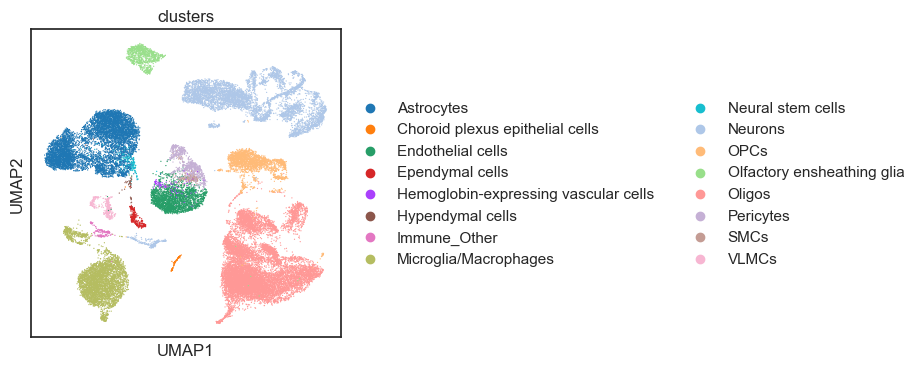

In [32]:
sc.pl.umap(ad, color=['clusters'])

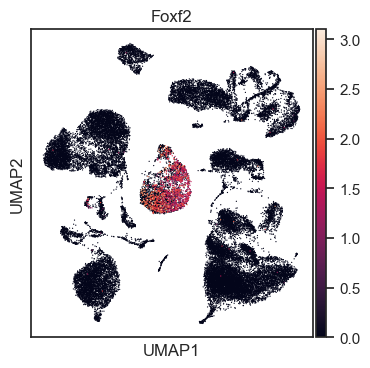

In [33]:
sc.pl.umap(ad, color=['Foxf2'])

In [34]:
adata=ad
del ad

# Focus on: Foxf2

In [45]:
adata_backup = adata

In [46]:
# drop aged samples
# adata = adata[adata.obs['age'].isin(['2-3mo'])]

In [47]:
gene="Foxf2"

## Plot

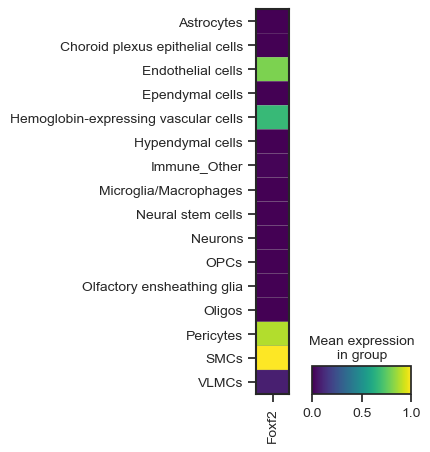

In [111]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

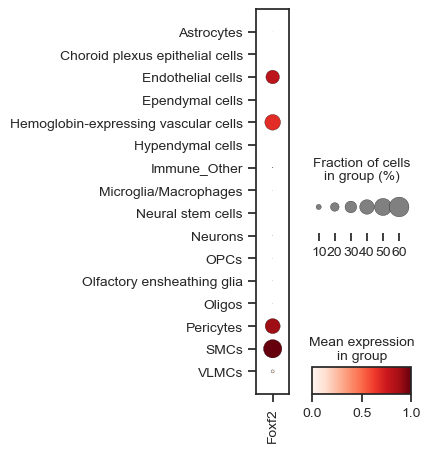

In [112]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

In [113]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

,mean_expression
clusters,
Astrocytes,0.000600
Choroid plexus epithelial cells,0.000000
Endothelial cells,0.800882
Ependymal cells,0.000000
Hemoglobin-expressing vascular cells,0.671937
Hypendymal cells,0.000000
Immune_Other,0.008116
Microglia/Macrophages,0.001501
Neural stem cells,0.000000


In [114]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

,fraction_of_cells
clusters,
Astrocytes,0.000289
Choroid plexus epithelial cells,0.000000
Endothelial cells,0.365106
Ependymal cells,0.000000
Hemoglobin-expressing vascular cells,0.444444
Hypendymal cells,0.000000
Immune_Other,0.006211
Microglia/Macrophages,0.000933
Neural stem cells,0.000000


In [115]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Ximerakis2019"
foxf2['organism'] = "Mouse"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters,,,,,,
Astrocytes,0.000600,0.000289,Foxf2,Ximerakis2019,Mouse,6931
Choroid plexus epithelial cells,0.000000,0.000000,Foxf2,Ximerakis2019,Mouse,89
Endothelial cells,0.800882,0.365106,Foxf2,Ximerakis2019,Mouse,2413
Ependymal cells,0.000000,0.000000,Foxf2,Ximerakis2019,Mouse,274
Hemoglobin-expressing vascular cells,0.671937,0.444444,Foxf2,Ximerakis2019,Mouse,81
Hypendymal cells,0.000000,0.000000,Foxf2,Ximerakis2019,Mouse,41
Immune_Other,0.008116,0.006211,Foxf2,Ximerakis2019,Mouse,161
Microglia/Macrophages,0.001501,0.000933,Foxf2,Ximerakis2019,Mouse,4287
Neural stem cells,0.000000,0.000000,Foxf2,Ximerakis2019,Mouse,166


In [116]:
# export
name='Ximerakis2019'

In [117]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Foxf2_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+name+'_normalized.csv',sep=';')

# Focus on: Other genes

## Foxo1

In [118]:
gene="Foxo1"

### Plot

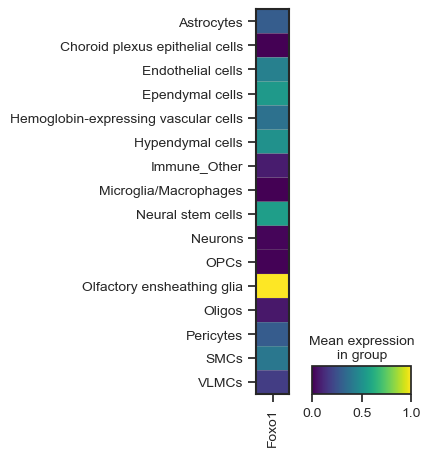

In [119]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

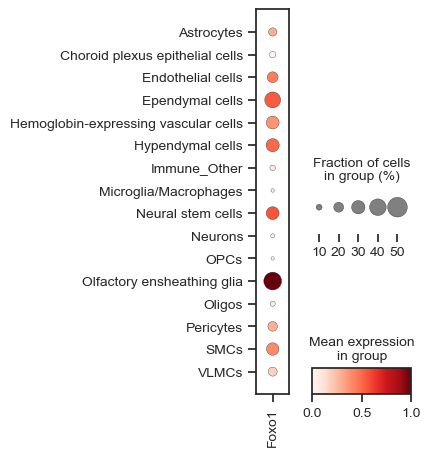

In [120]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

In [121]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

,mean_expression
clusters,
Astrocytes,0.289164
Choroid plexus epithelial cells,0.000000
Endothelial cells,0.431416
Ependymal cells,0.537096
Hemoglobin-expressing vascular cells,0.367536
Hypendymal cells,0.503536
Immune_Other,0.076182
Microglia/Macrophages,0.001717
Neural stem cells,0.557858


In [122]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

,fraction_of_cells
clusters,
Astrocytes,0.157120
Choroid plexus epithelial cells,0.112360
Endothelial cells,0.226274
Ependymal cells,0.375912
Hemoglobin-expressing vascular cells,0.283951
Hypendymal cells,0.292683
Immune_Other,0.093168
Microglia/Macrophages,0.048286
Neural stem cells,0.283133


In [123]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Ximerakis2019"
foxf2['organism'] = "Mouse"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters,,,,,,
Astrocytes,0.289164,0.157120,Foxo1,Ximerakis2019,Mouse,6931
Choroid plexus epithelial cells,0.000000,0.112360,Foxo1,Ximerakis2019,Mouse,89
Endothelial cells,0.431416,0.226274,Foxo1,Ximerakis2019,Mouse,2413
Ependymal cells,0.537096,0.375912,Foxo1,Ximerakis2019,Mouse,274
Hemoglobin-expressing vascular cells,0.367536,0.283951,Foxo1,Ximerakis2019,Mouse,81
Hypendymal cells,0.503536,0.292683,Foxo1,Ximerakis2019,Mouse,41
Immune_Other,0.076182,0.093168,Foxo1,Ximerakis2019,Mouse,161
Microglia/Macrophages,0.001717,0.048286,Foxo1,Ximerakis2019,Mouse,4287
Neural stem cells,0.557858,0.283133,Foxo1,Ximerakis2019,Mouse,166


In [124]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

## Tek = Tie2

In [125]:
gene="Tek"

### Plot

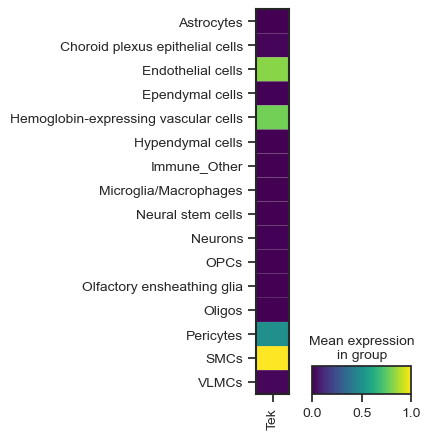

In [126]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

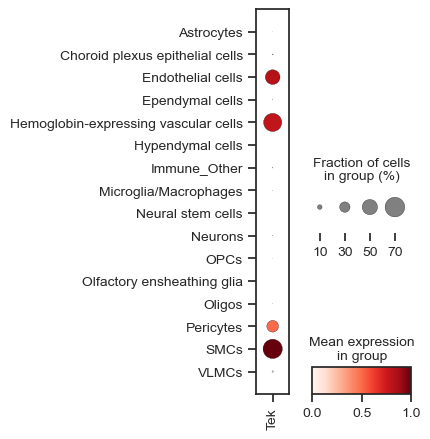

In [127]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

In [128]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

,mean_expression
clusters,
Astrocytes,0.001154
Choroid plexus epithelial cells,0.013320
Endothelial cells,0.822978
Ependymal cells,0.007038
Hemoglobin-expressing vascular cells,0.787353
Hypendymal cells,0.000000
Immune_Other,0.003597
Microglia/Macrophages,0.002114
Neural stem cells,0.000000


In [129]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

,fraction_of_cells
clusters,
Astrocytes,0.000866
Choroid plexus epithelial cells,0.011236
Endothelial cells,0.474099
Ependymal cells,0.003650
Hemoglobin-expressing vascular cells,0.629630
Hypendymal cells,0.000000
Immune_Other,0.006211
Microglia/Macrophages,0.001866
Neural stem cells,0.000000


In [130]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Ximerakis2019"
foxf2['organism'] = "Mouse"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters,,,,,,
Astrocytes,0.001154,0.000866,Tek,Ximerakis2019,Mouse,6931
Choroid plexus epithelial cells,0.013320,0.011236,Tek,Ximerakis2019,Mouse,89
Endothelial cells,0.822978,0.474099,Tek,Ximerakis2019,Mouse,2413
Ependymal cells,0.007038,0.003650,Tek,Ximerakis2019,Mouse,274
Hemoglobin-expressing vascular cells,0.787353,0.629630,Tek,Ximerakis2019,Mouse,81
Hypendymal cells,0.000000,0.000000,Tek,Ximerakis2019,Mouse,41
Immune_Other,0.003597,0.006211,Tek,Ximerakis2019,Mouse,161
Microglia/Macrophages,0.002114,0.001866,Tek,Ximerakis2019,Mouse,4287
Neural stem cells,0.000000,0.000000,Tek,Ximerakis2019,Mouse,166


In [131]:
# export
name='Ximerakis2019'

In [132]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

## Nos3 = eNOS

In [133]:
gene="Nos3"

### Plot

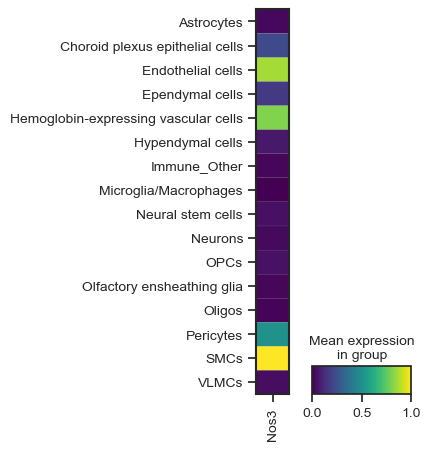

In [134]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

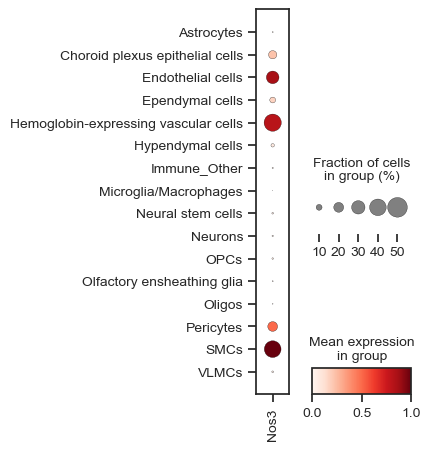

In [135]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

In [136]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

,mean_expression
clusters,
Astrocytes,0.020833
Choroid plexus epithelial cells,0.225696
Endothelial cells,0.865385
Ependymal cells,0.171545
Hemoglobin-expressing vascular cells,0.812368
Hypendymal cells,0.066195
Immune_Other,0.019121
Microglia/Macrophages,0.000000
Neural stem cells,0.040680


In [137]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

,fraction_of_cells
clusters,
Astrocytes,0.008945
Choroid plexus epithelial cells,0.157303
Endothelial cells,0.277663
Ependymal cells,0.098540
Hemoglobin-expressing vascular cells,0.419753
Hypendymal cells,0.048780
Immune_Other,0.012422
Microglia/Macrophages,0.001866
Neural stem cells,0.018072


In [138]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Ximerakis2019"
foxf2['organism'] = "Mouse"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

,mean_expression,fraction_of_cells,gene,source,organism,cell_number
clusters,,,,,,
Astrocytes,0.020833,0.008945,Nos3,Ximerakis2019,Mouse,6931
Choroid plexus epithelial cells,0.225696,0.157303,Nos3,Ximerakis2019,Mouse,89
Endothelial cells,0.865385,0.277663,Nos3,Ximerakis2019,Mouse,2413
Ependymal cells,0.171545,0.098540,Nos3,Ximerakis2019,Mouse,274
Hemoglobin-expressing vascular cells,0.812368,0.419753,Nos3,Ximerakis2019,Mouse,81
Hypendymal cells,0.066195,0.048780,Nos3,Ximerakis2019,Mouse,41
Immune_Other,0.019121,0.012422,Nos3,Ximerakis2019,Mouse,161
Microglia/Macrophages,0.000000,0.001866,Nos3,Ximerakis2019,Mouse,4287
Neural stem cells,0.040680,0.018072,Nos3,Ximerakis2019,Mouse,166


In [139]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

# Focus on: Aging

In [48]:
adata = adata_backup

In [49]:
pd.value_counts(adata.obs["age"])

age
21-22mo    21041
2-3mo      16028
Name: count, dtype: int64

## Foxf2 by age group

In [142]:
gene=["Foxf2","Foxo1","Tek","Nos3"]

### All cell types

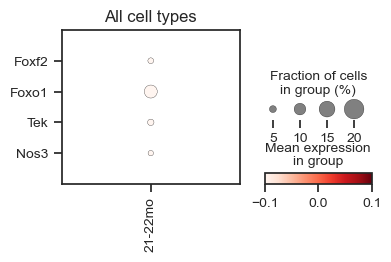

In [68]:
sc.pl.dotplot(adata, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized", title="All cell types")

### ECs only

In [69]:
# ECs only
adata_ecs = adata[adata.obs['clusters'].isin(['Endothelial cells'])]
adata_ecs

View of AnnData object with n_obs × n_vars = 1402 × 14699
    obs: 'NAME', 'cell_type', 'cell_type_by_age', 'cell_class', 'cell_class_by_age', 'all_cells_by_age', 'nGene', 'nUMI', 'age', 'clusters', 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'normalized'
    obsp: 'distances', 'connectivities'

In [67]:
pd.value_counts(adata_ecs.obs["age"])

21-22mo    1402
2-3mo      1011
Name: age, dtype: int64

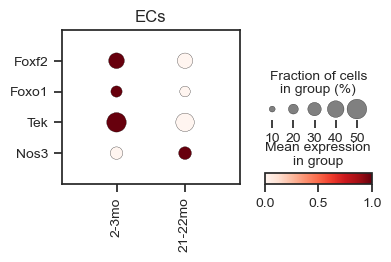

In [68]:
sc.pl.dotplot(adata_ecs, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized", title="ECs")

### PCs only

In [69]:
adata_pcs = adata[adata.obs['clusters'].isin(['Pericytes'])]
pd.value_counts(adata_pcs.obs["age"])

21-22mo    418
2-3mo      317
Name: age, dtype: int64

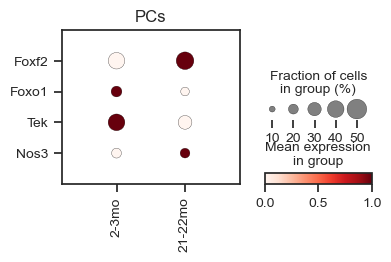

In [70]:
sc.pl.dotplot(adata_pcs, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized", title="PCs")

### SMCs only

In [71]:
adata_pcs = adata[adata.obs['clusters'].isin(['SMCs'])]
pd.value_counts(adata_pcs.obs["age"])

21-22mo    167
2-3mo       76
Name: age, dtype: int64

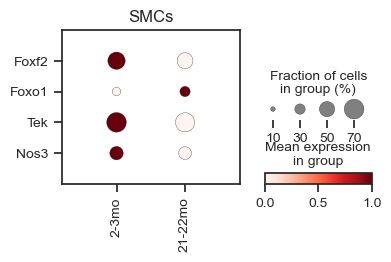

In [72]:
sc.pl.dotplot(adata_pcs, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized", title="SMCs")

### Neurons only

In [73]:
adata_neur = adata[adata.obs['clusters'].isin(['Neurons'])]
pd.value_counts(adata_neur.obs["age"])

21-22mo    3392
2-3mo      2381
Name: age, dtype: int64

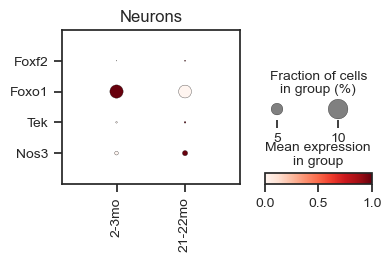

In [74]:
sc.pl.dotplot(adata_neur, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized", title="Neurons")

### Astrocytes only

In [75]:
adata_astro = adata[adata.obs['clusters'].isin(['Astrocytes'])]
pd.value_counts(adata_astro.obs["age"])

21-22mo    3533
2-3mo      3398
Name: age, dtype: int64

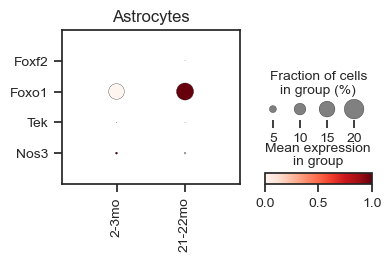

In [76]:
sc.pl.dotplot(adata_astro, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized", title="Astrocytes")

### Oligos only

In [77]:
adata_olig = adata[adata.obs['clusters'].isin(['Oligos'])]
pd.value_counts(adata_olig.obs["age"])

21-22mo    7497
2-3mo      4887
Name: age, dtype: int64

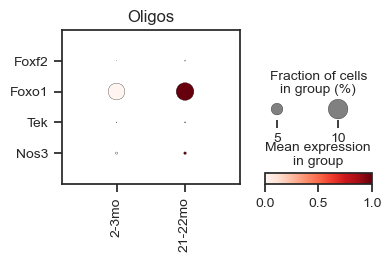

In [78]:
sc.pl.dotplot(adata_olig, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized", title="Oligos")

### Microglia only

In [79]:
adata_mg = adata[adata.obs['clusters'].isin(['Microglia/Macrophages'])]
pd.value_counts(adata_mg.obs["age"])

21-22mo    2434
2-3mo      1853
Name: age, dtype: int64

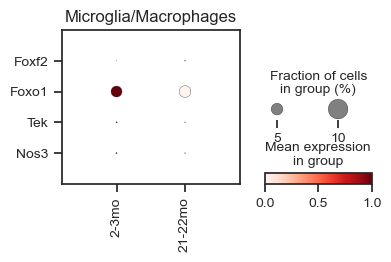

In [80]:
sc.pl.dotplot(adata_mg, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized", title="Microglia/Macrophages")

## Correlate gene expression (Foxf2 and Foxo1)

### ECs

In [18]:
gg = ["Foxf2","Foxo1"]

In [43]:
adata

NameError: name 'adata' is not defined

In [83]:
adata_ecs

View of AnnData object with n_obs × n_vars = 2413 × 14699
    obs: 'NAME', 'cell_type', 'cell_type_by_age', 'cell_class', 'cell_class_by_age', 'all_cells_by_age', 'nGene', 'nUMI', 'age', 'clusters', 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'normalized'
    obsp: 'distances', 'connectivities'

In [84]:
adat = adata_ecs
subs = adat[:,gg].X
subs = pd.DataFrame(subs, columns = gg, index=adat.obs.index)
age = pd.DataFrame(adat.obs["age"])
subs = subs.join(age)
subs.head()

,Foxf2,Foxo1,age
25937,0.000000,0.000000,2-3mo
25938,0.629082,0.629082,2-3mo
25939,1.543411,1.543411,2-3mo
25940,1.611682,0.000000,2-3mo
25941,0.000000,1.844929,2-3mo


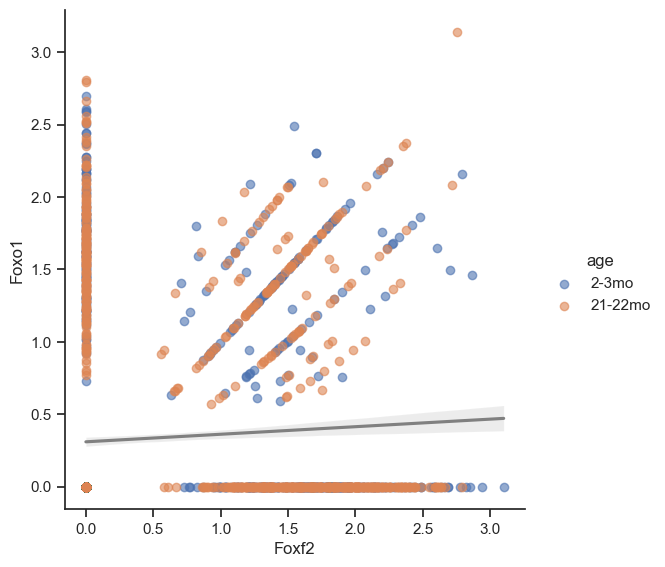

In [85]:
g = sns.lmplot(x="Foxf2", y="Foxo1", data=subs, hue="age", fit_reg=False, scatter_kws={'alpha':0.6})
sns.regplot(x="Foxf2", y="Foxo1", data=subs, scatter=False, ax=g.axes[0, 0], color="grey")
g.figure.set_size_inches(7,6)
plt.show()

In [86]:
import scipy as sp
r, p = sp.stats.pearsonr(subs['Foxf2'], subs['Foxo1'])
'Pearson R = {:.2f}, p = {:.2g}'.format(r, p)

'Pearson R = 0.07, p = 0.0013'

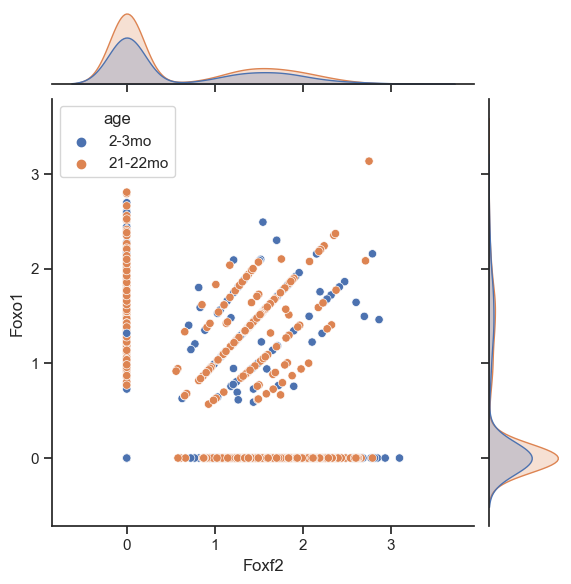

In [87]:
graph = sns.jointplot(data=subs, x="Foxf2", y="Foxo1", hue="age")
plt.show()

Exclude dropouts (cells with 0 expression of both genes)

In [88]:
coex = (adata_ecs[:,'{}'.format("Foxf2")].X > 0) | (adata_ecs[:,'{}'.format("Foxo1")].X > 0)

In [89]:
adata_ecs_above0 = adata_ecs[coex]
adata_ecs_above0

View of AnnData object with n_obs × n_vars = 1155 × 14699
    obs: 'NAME', 'cell_type', 'cell_type_by_age', 'cell_class', 'cell_class_by_age', 'all_cells_by_age', 'nGene', 'nUMI', 'age', 'clusters', 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'normalized'
    obsp: 'distances', 'connectivities'

In [90]:
pd.value_counts(adata_ecs_above0.obs["age"])

21-22mo    666
2-3mo      489
Name: age, dtype: int64

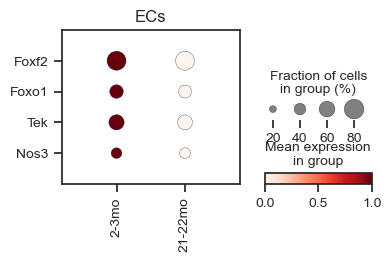

In [91]:
sc.pl.dotplot(adata_ecs_above0, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized", title="ECs")

In [92]:
adat = adata_ecs_above0
subs = adat[:,gg].X
subs = pd.DataFrame(subs, columns = gg, index=adat.obs.index)
age = pd.DataFrame(adat.obs["age"])
subs = subs.join(age)

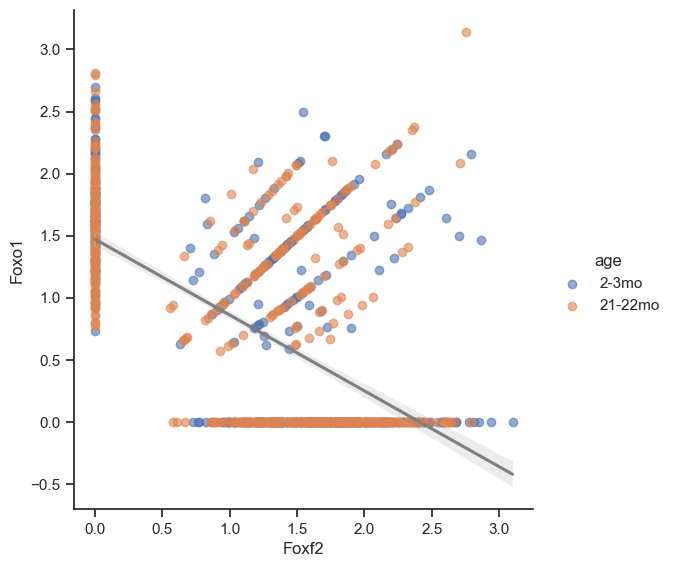

In [93]:
g = sns.lmplot(x="Foxf2", y="Foxo1", data=subs, hue="age", fit_reg=False, scatter_kws={'alpha':0.6})
sns.regplot(x="Foxf2", y="Foxo1", data=subs, scatter=False, ax=g.axes[0, 0], color="grey")
g.figure.set_size_inches(7,6)
plt.show()

In [94]:
r, p = sp.stats.pearsonr(subs['Foxf2'], subs['Foxo1'])
'Pearson R = {:.2f}, p = {:.2g}'.format(r, p)

'Pearson R = -0.60, p = 2.2e-113'

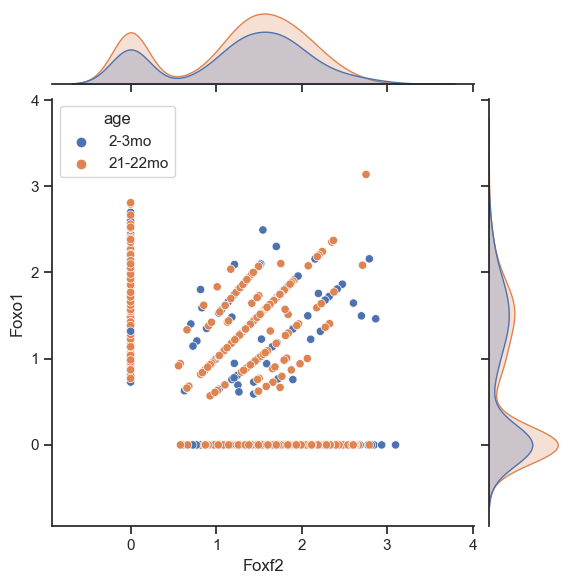

In [95]:
graph = sns.jointplot(data=subs, x="Foxf2", y="Foxo1", hue="age")
plt.show()

### All cell types

In [96]:
gg = ["Foxf2","Foxo1"]

In [97]:
adata

AnnData object with n_obs × n_vars = 37069 × 14699
    obs: 'NAME', 'cell_type', 'cell_type_by_age', 'cell_class', 'cell_class_by_age', 'all_cells_by_age', 'nGene', 'nUMI', 'age', 'clusters', 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'normalized'
    obsp: 'distances', 'connectivities'

In [98]:
adat = adata
subs = adat[:,gg].X
subs = pd.DataFrame(subs, columns = gg, index=adat.obs.index)
age = pd.DataFrame(adat.obs["age"])
subs = subs.join(age)
subs.head()

,Foxf2,Foxo1,age
0,0.0,0.0,2-3mo
1,0.0,0.0,2-3mo
2,0.0,0.0,2-3mo
3,0.0,0.0,2-3mo
4,0.0,0.0,2-3mo


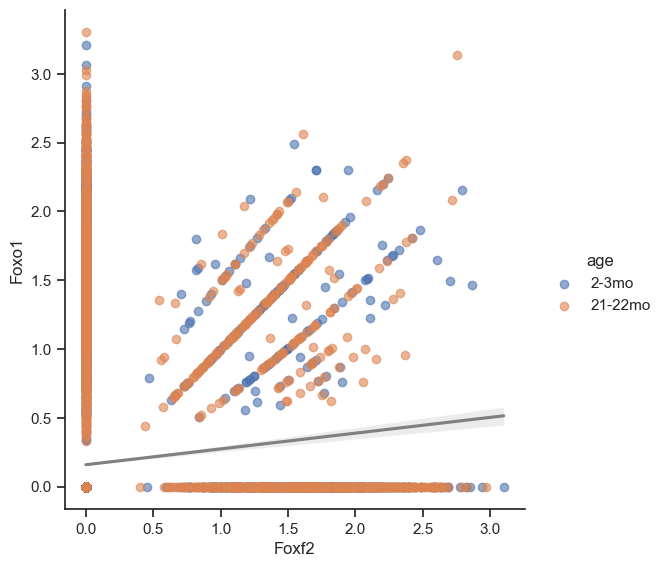

In [99]:
g = sns.lmplot(x="Foxf2", y="Foxo1", data=subs, hue="age", fit_reg=False, scatter_kws={'alpha':0.6})
sns.regplot(x="Foxf2", y="Foxo1", data=subs, scatter=False, ax=g.axes[0, 0], color="grey")
g.figure.set_size_inches(7,6)
plt.show()

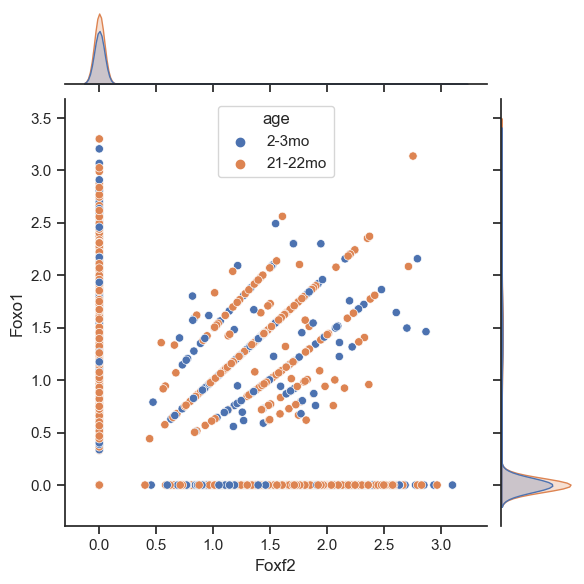

In [100]:
graph = sns.jointplot(data=subs, x="Foxf2", y="Foxo1", hue="age")
plt.show()

Exclude dropouts (cells with 0 expression of both genes)

In [101]:
coex = (adat[:,'{}'.format("Foxf2")].X > 0) | (adat[:,'{}'.format("Foxo1")].X > 0)

In [102]:
adata_above0 = adat[coex]
adata_above0

View of AnnData object with n_obs × n_vars = 5202 × 14699
    obs: 'NAME', 'cell_type', 'cell_type_by_age', 'cell_class', 'cell_class_by_age', 'all_cells_by_age', 'nGene', 'nUMI', 'age', 'clusters', 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'normalized'
    obsp: 'distances', 'connectivities'

In [103]:
pd.value_counts(adata_above0.obs["age"])

21-22mo    3026
2-3mo      2176
Name: age, dtype: int64

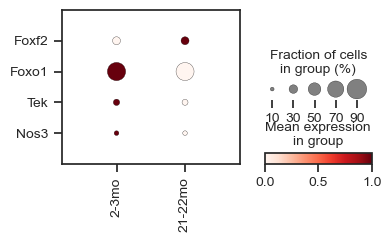

In [104]:
sc.pl.dotplot(adata_above0, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized")

In [105]:
adat = adata_above0
subs = adat[:,gg].X
subs = pd.DataFrame(subs, columns = gg, index=adat.obs.index)
age = pd.DataFrame(adat.obs["age"])
subs = subs.join(age)

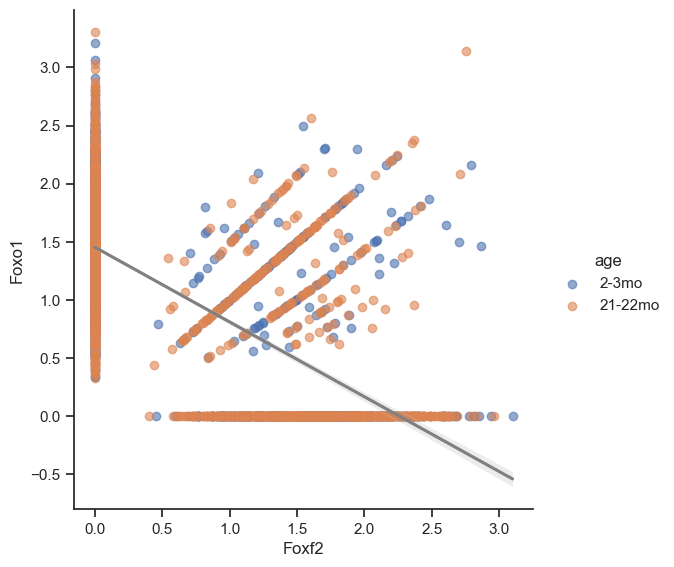

In [106]:
g = sns.lmplot(x="Foxf2", y="Foxo1", data=subs, hue="age", fit_reg=False, scatter_kws={'alpha':0.6})
sns.regplot(x="Foxf2", y="Foxo1", data=subs, scatter=False, ax=g.axes[0, 0], color="grey")
g.figure.set_size_inches(7,6)
plt.show()

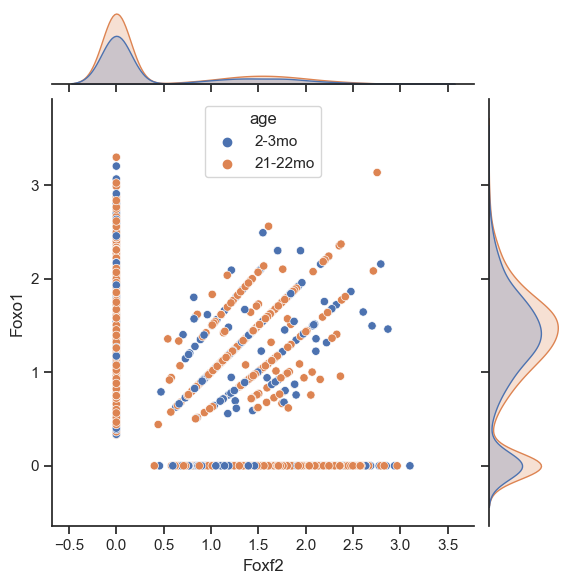

In [107]:
graph = sns.jointplot(data=subs, x="Foxf2", y="Foxo1", hue="age")
plt.show()

## Pseudobulk analysis (decoupler)

Because correlation on single cell level is biased by large number of dropouts

In [108]:
import decoupler as dc

In [109]:
adata

AnnData object with n_obs × n_vars = 37069 × 14699
    obs: 'NAME', 'cell_type', 'cell_type_by_age', 'cell_class', 'cell_class_by_age', 'all_cells_by_age', 'nGene', 'nUMI', 'age', 'clusters', 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'normalized'
    obsp: 'distances', 'connectivities'

In [110]:
adata.obs["sample"] = adata.obs['NAME'].str.extract('_([0-9]+)_?')
pd.value_counts(adata.obs["sample"])

33    3984
34    3803
44    2928
28    2648
43    2597
27    2519
20    2279
40    2242
39    2175
21    1856
19    1851
22    1839
37    1823
7     1666
38    1489
6     1370
Name: sample, dtype: int64

In [111]:
pd.crosstab(adata.obs["sample"], adata.obs["age"]).T

sample,19,20,21,22,27,28,33,34,37,38,39,40,43,44,6,7
age,,,,,,,,,,,,,,,,
2-3mo,1851,2279,1856,1839,2519,2648,0,0,0,0,0,0,0,0,1370,1666
21-22mo,0,0,0,0,0,0,3984,3803,1823,1489,2175,2242,2597,2928,0,0


In [112]:
padata = dc.get_pseudobulk(adata, sample_col='sample', groups_col=None, layer='normalized', min_prop=0.01, min_smpls=0)

D:\Programme\Anaconda\envs\squidpy\lib\site-packages\decoupler\utils_anndata.py:203: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  psbulk = AnnData(psbulk, obs=new_obs, var=new_var)


In [113]:
padata

View of AnnData object with n_obs × n_vars = 16 × 13311
    obs: 'all_cells_by_age', 'age', 'sample'

### Correlate gene expression (Foxf2 and Foxo1)

#### All cell types

In [114]:
gg = ["Foxf2","Foxo1"]

In [115]:
padata

View of AnnData object with n_obs × n_vars = 16 × 13311
    obs: 'all_cells_by_age', 'age', 'sample'

In [116]:
adat = padata
subs = adat[:,gg].X
subs = pd.DataFrame(subs, columns = gg, index=adat.obs.index)
age = pd.DataFrame(adat.obs["age"])
subs = subs.join(age)
subs.head()

,Foxf2,Foxo1,age
19,116.895699,319.274170,2-3mo
20,137.592239,353.048340,2-3mo
21,94.136703,280.071716,2-3mo
22,87.729050,303.521088,2-3mo
27,141.274338,392.612549,2-3mo


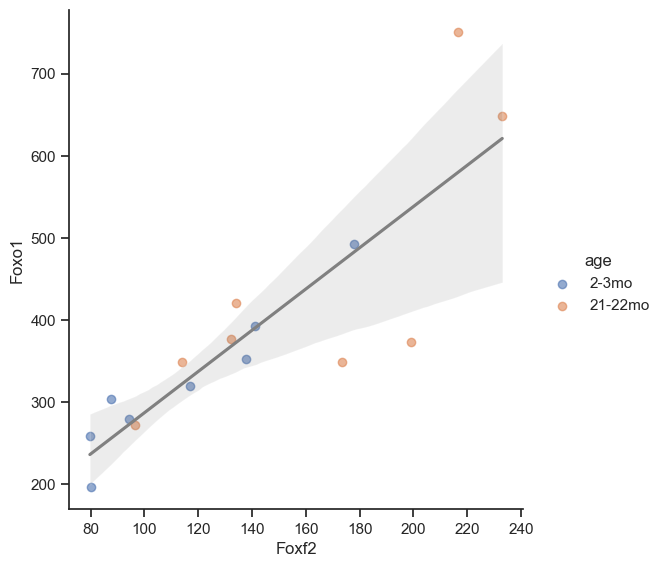

In [117]:
g = sns.lmplot(x="Foxf2", y="Foxo1", data=subs, hue="age", fit_reg=False, scatter_kws={'alpha':0.6})
sns.regplot(x="Foxf2", y="Foxo1", data=subs, scatter=False, ax=g.axes[0, 0], color="grey")
g.figure.set_size_inches(7,6)
plt.show()

In [118]:
import scipy as sp
r, p = sp.stats.pearsonr(subs['Foxf2'], subs['Foxo1'])
'Pearson R = {:.2f}, p = {:.2g}'.format(r, p)

'Pearson R = 0.86, p = 2e-05'

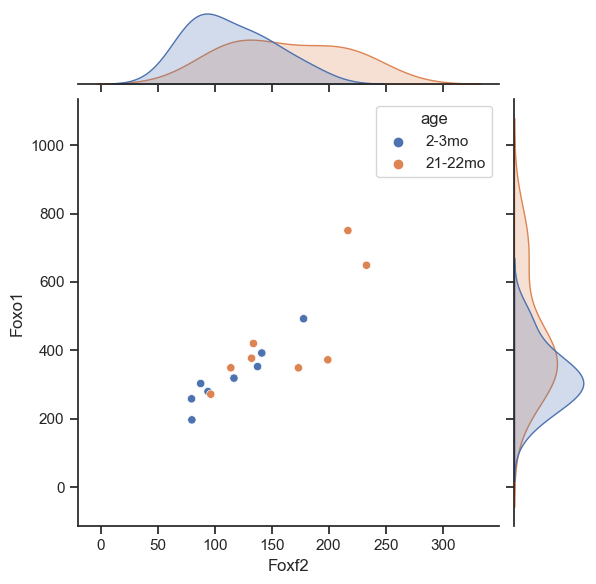

In [119]:
graph = sns.jointplot(data=subs, x="Foxf2", y="Foxo1", hue="age")
plt.show()

#### ECs

In [ ]:
padata = dc.get_pseudobulk(adata, sample_col='sample', groups_col='clusters', layer='normalized', min_prop=0.2, min_smpls=3)

In [121]:
padata

View of AnnData object with n_obs × n_vars = 177 × 9116
    obs: 'cell_class', 'cell_class_by_age', 'all_cells_by_age', 'age', 'clusters', 'sample'

In [122]:
# ECs only
padata_ecs = padata[padata.obs['clusters'].isin(['Endothelial cells'])]
padata_ecs

View of AnnData object with n_obs × n_vars = 16 × 9116
    obs: 'cell_class', 'cell_class_by_age', 'all_cells_by_age', 'age', 'clusters', 'sample'

In [123]:
gg = ["Foxf2","Foxo1"]

In [124]:
adat = padata_ecs
subs = adat[:,gg].X
subs = pd.DataFrame(subs, columns = gg, index=adat.obs.index)
age = pd.DataFrame(adat.obs["age"])
subs = subs.join(age)
subs.head()

,Foxf2,Foxo1,age
19_Endothelial cells,73.825768,51.537140,2-3mo
20_Endothelial cells,88.930351,45.764889,2-3mo
21_Endothelial cells,61.846519,43.998405,2-3mo
22_Endothelial cells,60.701096,30.795637,2-3mo
27_Endothelial cells,94.829109,66.395706,2-3mo


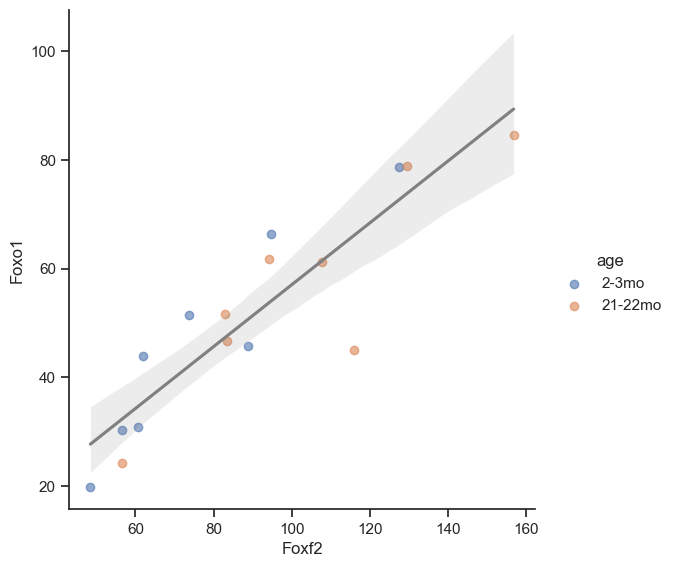

In [125]:
g = sns.lmplot(x="Foxf2", y="Foxo1", data=subs, hue="age", fit_reg=False, scatter_kws={'alpha':0.6})
sns.regplot(x="Foxf2", y="Foxo1", data=subs, scatter=False, ax=g.axes[0, 0], color="grey")
g.figure.set_size_inches(7,6)
plt.show()

In [126]:
import scipy as sp
r, p = sp.stats.pearsonr(subs['Foxf2'], subs['Foxo1'])
'Pearson R = {:.2f}, p = {:.2g}'.format(r, p)

'Pearson R = 0.90, p = 2.1e-06'

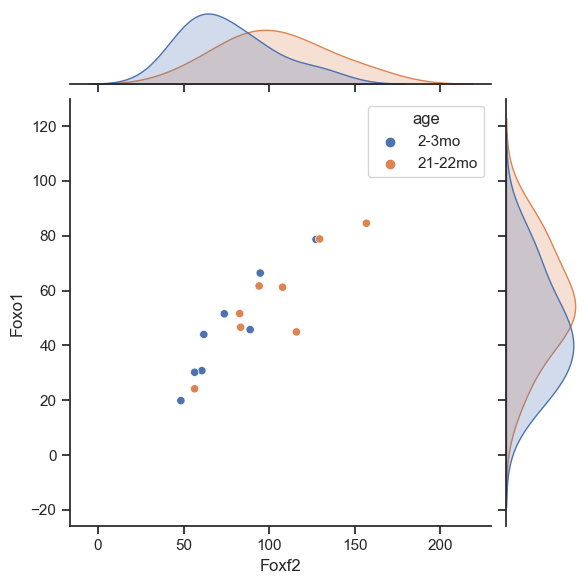

In [127]:
graph = sns.jointplot(data=subs, x="Foxf2", y="Foxo1", hue="age")
plt.show()

## Denoising (MAGIC)

In [35]:
import magic
import scprep

### Correlate gene expression (Foxf2 and Foxo1)

#### ECs

In [171]:
gg = ["Foxf2","Foxo1"]

In [172]:
adata

AnnData object with n_obs × n_vars = 37069 × 14699
    obs: 'NAME', 'cell_type', 'cell_type_by_age', 'cell_class', 'cell_class_by_age', 'all_cells_by_age', 'nGene', 'nUMI', 'age', 'clusters', 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'normalized'
    obsp: 'distances', 'connectivities'

In [173]:
adata_EC = adata[adata.obs.clusters == "Endothelial cells"]

In [174]:
adata_EC

View of AnnData object with n_obs × n_vars = 2413 × 14699
    obs: 'NAME', 'cell_type', 'cell_type_by_age', 'cell_class', 'cell_class_by_age', 'all_cells_by_age', 'nGene', 'nUMI', 'age', 'clusters', 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'normalized'
    obsp: 'distances', 'connectivities'

In [175]:
#adata_EC = adata_EC[adata_EC.obs.age == "21-22mo"]

In [176]:
adata_EC

View of AnnData object with n_obs × n_vars = 2413 × 14699
    obs: 'NAME', 'cell_type', 'cell_type_by_age', 'cell_class', 'cell_class_by_age', 'all_cells_by_age', 'nGene', 'nUMI', 'age', 'clusters', 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'normalized'
    obsp: 'distances', 'connectivities'

In [177]:
matrix = pd.DataFrame(adata_EC.X)
matrix.columns = adata_EC.var.index.tolist()

In [178]:
matrix.head()

,Sox17,Mrpl15,Lypla1,Tcea1,Rgs20,Atp6v1h,Oprk1,Rb1cc1,4732440D04Rik,St18,...,mt-Nd3,mt-Nd4l,mt-Nd4,mt-Nd5,mt-Nd6,mt-Cytb,Vamp7,AC168977.1,PISD,DHRSX
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.197225,4.859812,2.197225,0.000000,4.488636,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.0,1.012246,0.0,0.0,0.0,0.0,0.0,0.0,...,0.629082,0.000000,3.762190,0.629082,0.000000,4.422849,0.0,0.0,1.012246,1.012246
2,2.123585,1.543411,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,2.123585,0.000000,3.632449,1.543411,0.000000,4.532742,0.0,0.0,1.543411,0.000000
3,1.611682,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,2.199717,1.611682,3.716308,2.567538,1.611682,4.694126,0.0,0.0,0.000000,0.000000
4,1.844929,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.844929,0.000000,3.495474,0.000000,0.000000,3.994092,0.0,0.0,0.000000,1.844929


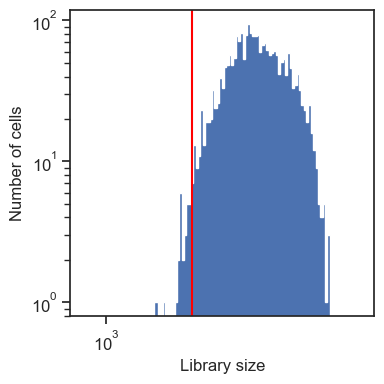

<Axes: xlabel='Library size', ylabel='Number of cells'>

In [179]:
scprep.plot.plot_library_size(matrix, cutoff=1500)

Note: Skipped normalization as data is already log-normalized

In [180]:
adata_EC.layers

LayersView with keys: normalized

##### Creating the MAGIC operator
If you don't specify parameters, MAGIC creates an operator with the following default values: knn=5, knn_max = 3 * knn, decay=1, t=3.

In [181]:
magic_op = magic.MAGIC()

##### Running MAGIC with gene selection
The magic_op.fit_transform function takes the normalized data and an array of selected genes as its arguments. If no genes are provided, MAGIC will return a matrix of all genes. The same can be achieved by substituting the array of gene names with genes='all_genes'.

In [182]:
%%time
emt_magic = magic_op.fit_transform(matrix, genes=['Foxf2', 'Foxo1', 'Nos3'])

Calculating MAGIC...
  Running MAGIC on 2413 cells and 14699 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


C:\Users\sfrerich\AppData\Roaming\Python\Python311\site-packages\magic\magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculated PCA in 2.34 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.68 seconds.
    Calculating affinities...
    Calculated affinities in 0.71 seconds.
  Calculated graph and diffusion operator in 3.79 seconds.
  Calculating imputation...
Calculated MAGIC in 3.92 seconds.
CPU times: total: 10.5 s
Wall time: 3.92 s


##### Visualizing gene-gene relationships

We can see gene-gene relationships much more clearly after applying MAGIC. Note that the change in absolute values of gene expression is not meaningful - the relative difference is all that matters.

##### All ECs

In [183]:
np.corrcoef(emt_magic[['Foxf2','Foxo1']], rowvar = False)[0][1]

0.6968467007514669

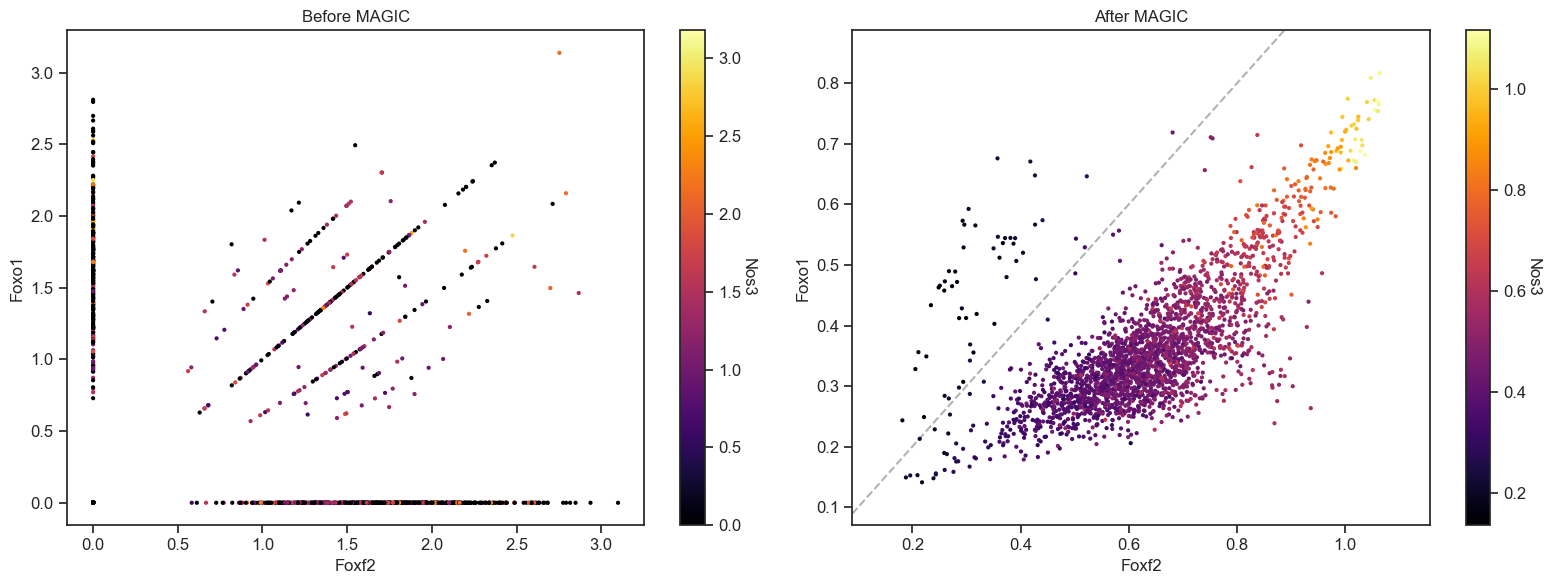

In [101]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

scprep.plot.scatter(x=matrix['Foxf2'], y=matrix['Foxo1'], c=matrix['Nos3'],  ax=ax1,
                    xlabel='Foxf2', ylabel='Foxo1', legend_title="Nos3", title='Before MAGIC')

scprep.plot.scatter(x=emt_magic['Foxf2'], y=emt_magic['Foxo1'], c=emt_magic['Nos3'], ax=ax2,
                    xlabel='Foxf2', ylabel='Foxo1', legend_title="Nos3", title='After MAGIC')
plt.axline((0.2,0.2), slope=1, color="black", alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

##### 21-22mo EC only

In [169]:
np.corrcoef(emt_magic[['Foxf2','Foxo1']], rowvar = False)[0][1]

0.4481690580444985

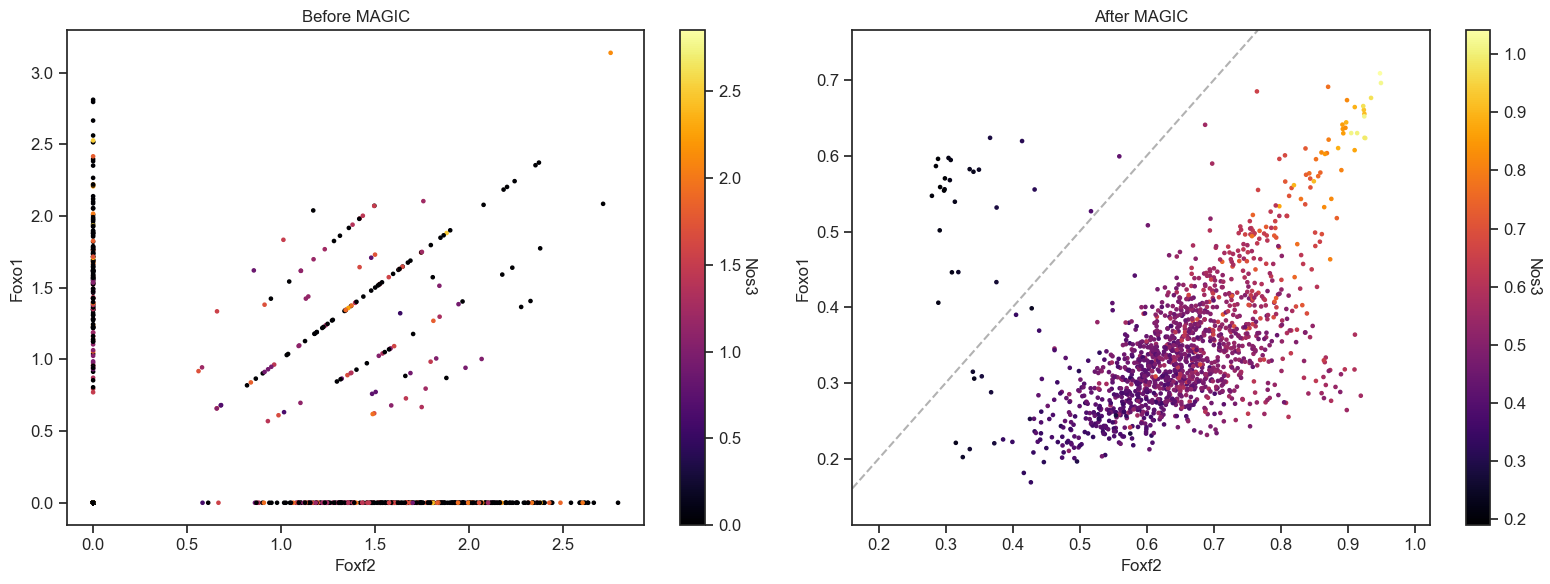

In [170]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

scprep.plot.scatter(x=matrix['Foxf2'], y=matrix['Foxo1'], c=matrix['Nos3'],  ax=ax1,
                    xlabel='Foxf2', ylabel='Foxo1', legend_title="Nos3", title='Before MAGIC')

scprep.plot.scatter(x=emt_magic['Foxf2'], y=emt_magic['Foxo1'], c=emt_magic['Nos3'], ax=ax2,
                    xlabel='Foxf2', ylabel='Foxo1', legend_title="Nos3", title='After MAGIC')
plt.axline((0.2,0.2), slope=1, color="black", alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

##### 2-3mo ECs only

In [152]:
np.corrcoef(emt_magic[['Foxf2','Foxo1']], rowvar = False)[0][1]

0.7393364029284432

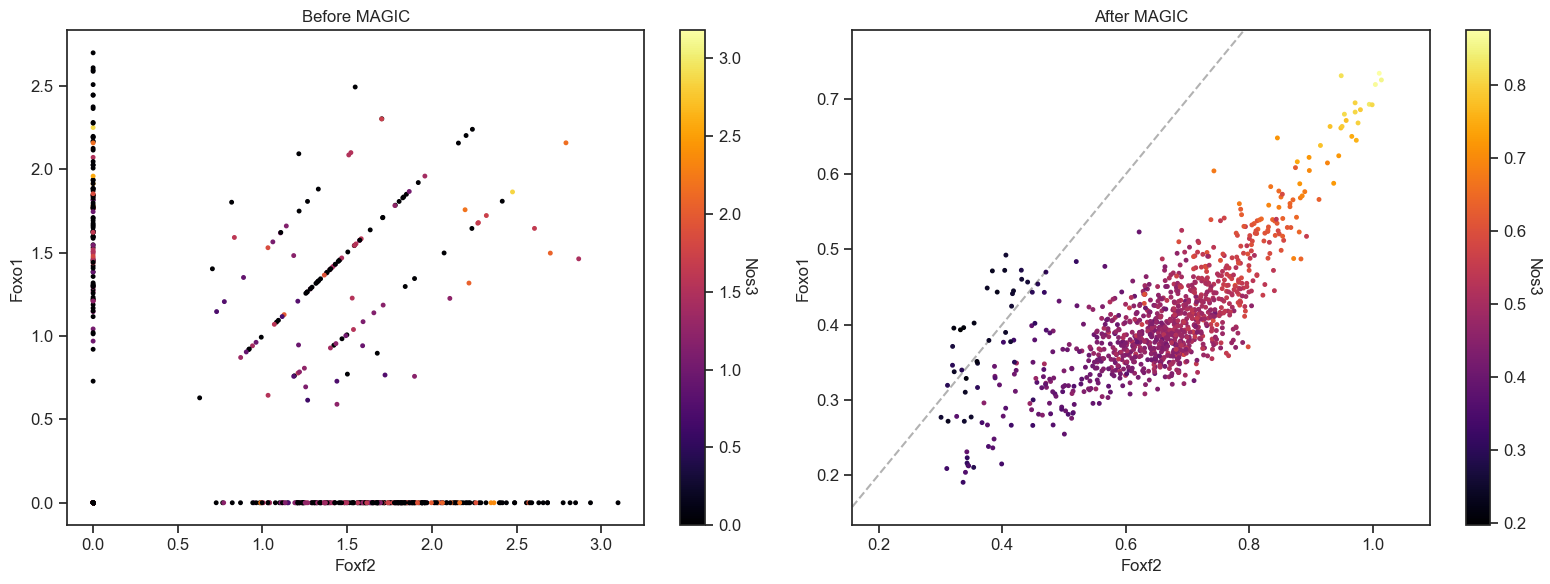

In [153]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

scprep.plot.scatter(x=matrix['Foxf2'], y=matrix['Foxo1'], c=matrix['Nos3'],  ax=ax1,
                    xlabel='Foxf2', ylabel='Foxo1', legend_title="Nos3", title='Before MAGIC')

scprep.plot.scatter(x=emt_magic['Foxf2'], y=emt_magic['Foxo1'], c=emt_magic['Nos3'], ax=ax2,
                    xlabel='Foxf2', ylabel='Foxo1', legend_title="Nos3", title='After MAGIC')
plt.axline((0.2,0.2), slope=1, color="black", alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

#### PCs

In [61]:
adata_EC = adata[adata.obs.clusters == "Pericytes"]

In [62]:
matrix = pd.DataFrame(adata_EC.X)
matrix.columns = adata_EC.var.index.tolist()

In [63]:
matrix.head()

,Sox17,Mrpl15,Lypla1,Tcea1,Rgs20,Atp6v1h,Oprk1,Rb1cc1,4732440D04Rik,St18,...,mt-Nd3,mt-Nd4l,mt-Nd4,mt-Nd5,mt-Nd6,mt-Cytb,Vamp7,AC168977.1,PISD,DHRSX
0,0.000000,1.385021,0.0,1.944454,0.0,0.000000,0.0,1.385021,0.0,0.0,...,0.000000,1.944454,2.301057,0.000000,0.0,3.826980,1.385021,0.0,0.0,0.0
1,0.000000,0.000000,0.0,1.433867,0.0,0.000000,0.0,1.433867,0.0,0.0,...,2.000098,1.433867,4.392870,0.000000,0.0,4.605586,2.000098,0.0,0.0,0.0
2,1.035623,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,1.035623,1.035623,3.203526,1.035623,0.0,4.195802,0.000000,0.0,0.0,0.0
3,2.191556,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,1.604337,4.436347,1.604337,0.0,3.964033,0.000000,0.0,0.0,0.0
4,0.796953,0.000000,0.0,0.796953,0.0,0.796953,0.0,0.000000,0.0,0.0,...,1.538223,1.234756,3.626021,2.254590,0.0,3.977943,0.000000,0.0,0.0,0.0


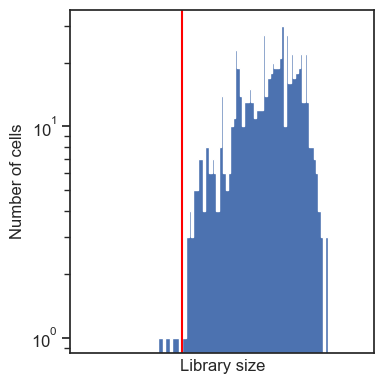

<Axes: xlabel='Library size', ylabel='Number of cells'>

In [64]:
scprep.plot.plot_library_size(matrix, cutoff=1500)

Note: Skipped normalization as data is already log-normalized

In [65]:
adata_EC.layers

LayersView with keys: normalized

##### Creating the MAGIC operator
If you don't specify parameters, MAGIC creates an operator with the following default values: knn=5, knn_max = 3 * knn, decay=1, t=3.

In [66]:
magic_op = magic.MAGIC()

##### Running MAGIC with gene selection
The magic_op.fit_transform function takes the normalized data and an array of selected genes as its arguments. If no genes are provided, MAGIC will return a matrix of all genes. The same can be achieved by substituting the array of gene names with genes='all_genes'.

In [67]:
%%time
emt_magic = magic_op.fit_transform(matrix, genes=['Foxf2', 'Foxo1', 'Nos3'])

Calculating MAGIC...
  Running MAGIC on 735 cells and 14699 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


C:\Users\sfrerich\AppData\Roaming\Python\Python311\site-packages\magic\magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculated PCA in 0.96 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.07 seconds.
    Calculating affinities...
    Calculated affinities in 0.06 seconds.
  Calculated graph and diffusion operator in 1.13 seconds.
  Calculating imputation...
Calculated MAGIC in 1.19 seconds.
CPU times: total: 3.92 s
Wall time: 1.19 s


##### Visualizing gene-gene relationships

We can see gene-gene relationships much more clearly after applying MAGIC. Note that the change in absolute values of gene expression is not meaningful - the relative difference is all that matters.

In [68]:
np.corrcoef(emt_magic[['Foxf2','Foxo1']], rowvar = False)[0][1]

0.9098713825474563

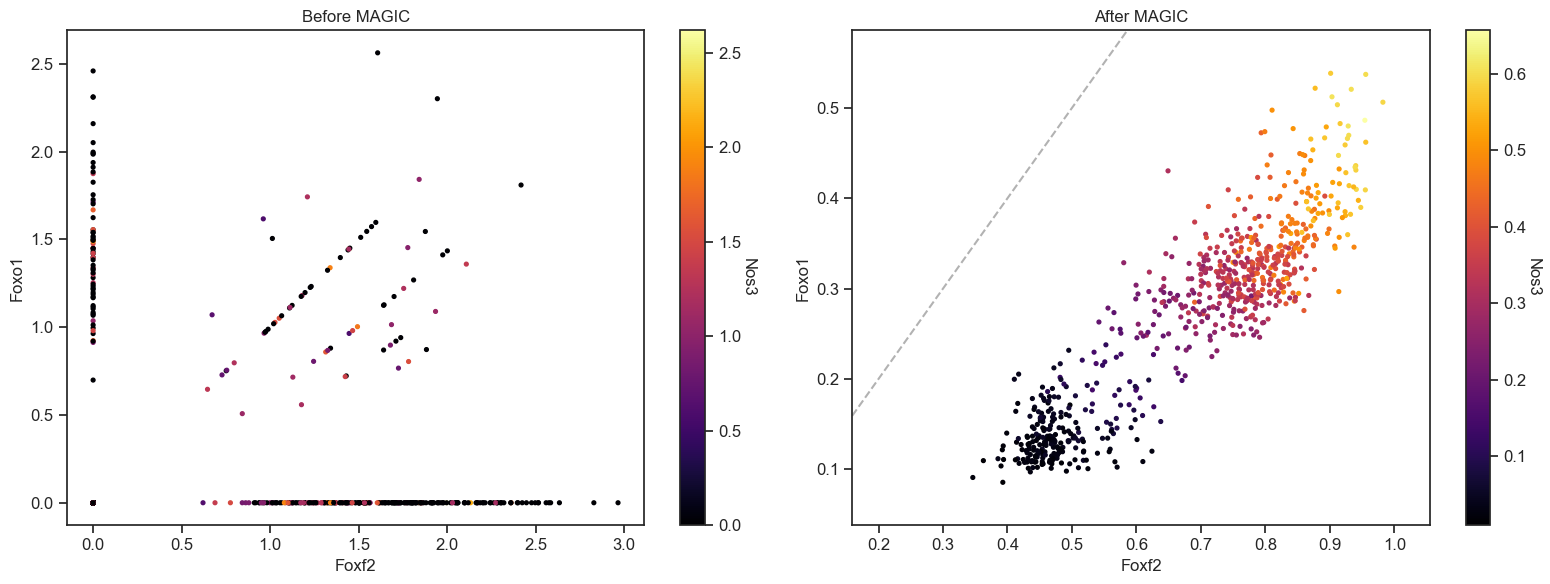

In [69]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

scprep.plot.scatter(x=matrix['Foxf2'], y=matrix['Foxo1'], c=matrix['Nos3'],  ax=ax1,
                    xlabel='Foxf2', ylabel='Foxo1', legend_title="Nos3", title='Before MAGIC')

scprep.plot.scatter(x=emt_magic['Foxf2'], y=emt_magic['Foxo1'], c=emt_magic['Nos3'], ax=ax2,
                    xlabel='Foxf2', ylabel='Foxo1', legend_title="Nos3", title='After MAGIC')
plt.axline((0.2,0.2), slope=1, color="black", alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

#### SMCs

In [70]:
adata_EC = adata[adata.obs.clusters == "SMCs"]

In [71]:
matrix = pd.DataFrame(adata_EC.X)
matrix.columns = adata_EC.var.index.tolist()

In [72]:
matrix.head()

,Sox17,Mrpl15,Lypla1,Tcea1,Rgs20,Atp6v1h,Oprk1,Rb1cc1,4732440D04Rik,St18,...,mt-Nd3,mt-Nd4l,mt-Nd4,mt-Nd5,mt-Nd6,mt-Cytb,Vamp7,AC168977.1,PISD,DHRSX
0,2.041728,0.75015,0.000000,0.750150,0.0,0.0,0.0,0.000000,0.0,0.0,...,2.296421,0.750150,4.000607,1.699146,0.0,4.704990,0.750150,0.0,1.173917,0.0
1,0.000000,0.00000,1.369945,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.369945,1.369945,4.521670,2.544789,0.0,4.995567,0.000000,0.0,0.000000,0.0
2,1.052196,0.00000,0.000000,1.052196,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,1.052196,4.248003,1.885826,0.0,4.462925,1.052196,0.0,1.052196,0.0
3,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.969107,0.0,0.0,...,0.969107,1.776099,4.196053,1.451890,0.0,4.660395,0.969107,0.0,1.451890,0.0
4,1.818589,0.00000,0.000000,1.120133,0.0,0.0,0.0,0.709331,0.0,0.0,...,1.410473,1.120133,3.465077,1.635208,0.0,3.923285,0.000000,0.0,1.120133,0.0


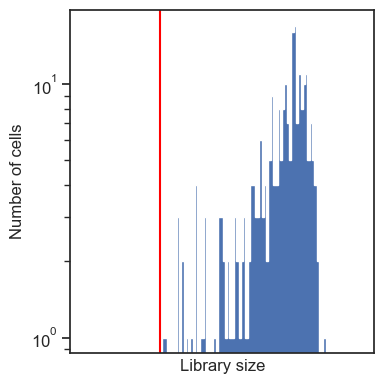

<Axes: xlabel='Library size', ylabel='Number of cells'>

In [73]:
scprep.plot.plot_library_size(matrix, cutoff=1500)

Note: Skipped normalization as data is already log-normalized

In [74]:
adata_EC.layers

LayersView with keys: normalized

##### Creating the MAGIC operator
If you don't specify parameters, MAGIC creates an operator with the following default values: knn=5, knn_max = 3 * knn, decay=1, t=3.

In [75]:
magic_op = magic.MAGIC()

##### Running MAGIC with gene selection
The magic_op.fit_transform function takes the normalized data and an array of selected genes as its arguments. If no genes are provided, MAGIC will return a matrix of all genes. The same can be achieved by substituting the array of gene names with genes='all_genes'.

In [76]:
%%time
emt_magic = magic_op.fit_transform(matrix, genes=['Foxf2', 'Foxo1', 'Nos3'])

Calculating MAGIC...
  Running MAGIC on 243 cells and 14699 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


C:\Users\sfrerich\AppData\Roaming\Python\Python311\site-packages\magic\magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculated PCA in 0.42 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.45 seconds.
  Calculating imputation...
Calculated MAGIC in 0.50 seconds.
CPU times: total: 1.55 s
Wall time: 506 ms


##### Visualizing gene-gene relationships

We can see gene-gene relationships much more clearly after applying MAGIC. Note that the change in absolute values of gene expression is not meaningful - the relative difference is all that matters.

In [77]:
np.corrcoef(emt_magic[['Foxf2','Foxo1']], rowvar = False)[0][1]

0.7823848640967933

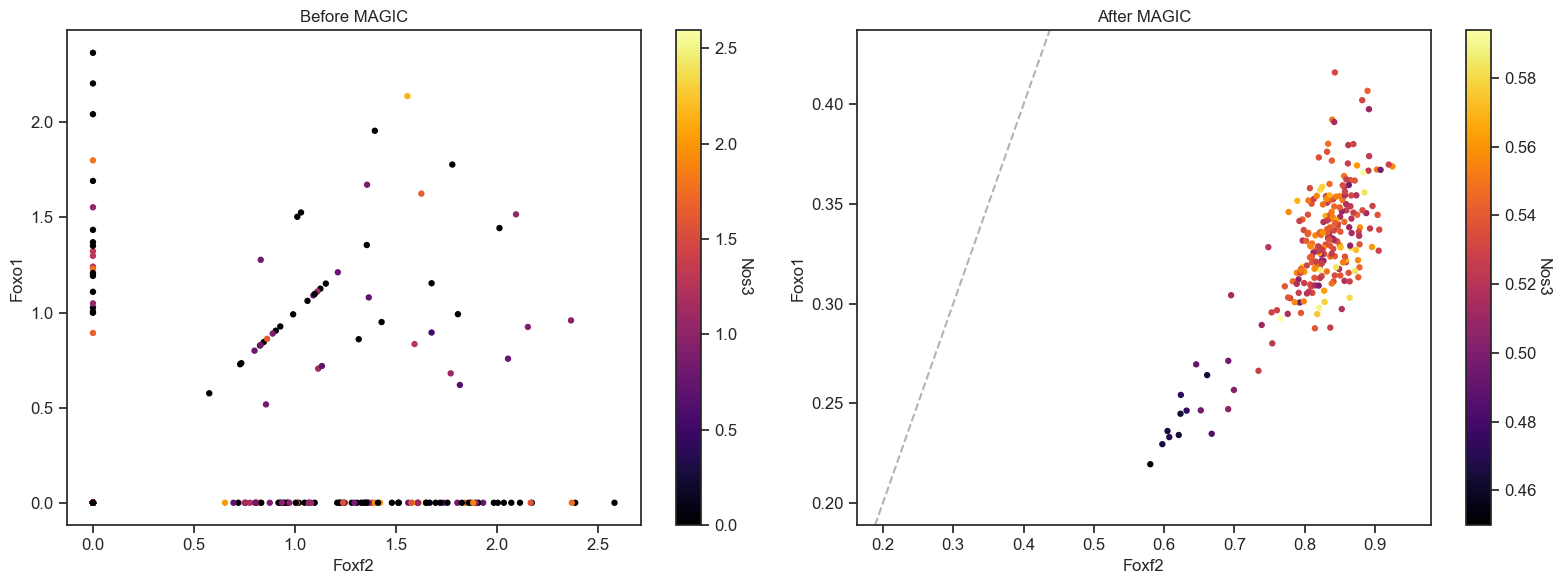

In [78]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

scprep.plot.scatter(x=matrix['Foxf2'], y=matrix['Foxo1'], c=matrix['Nos3'],  ax=ax1,
                    xlabel='Foxf2', ylabel='Foxo1', legend_title="Nos3", title='Before MAGIC')

scprep.plot.scatter(x=emt_magic['Foxf2'], y=emt_magic['Foxo1'], c=emt_magic['Nos3'], ax=ax2,
                    xlabel='Foxf2', ylabel='Foxo1', legend_title="Nos3", title='After MAGIC')
plt.axline((0.2,0.2), slope=1, color="black", alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

#### All cell types

In [79]:
gg = ["Foxf2","Foxo1"]

In [80]:
adata

AnnData object with n_obs × n_vars = 37069 × 14699
    obs: 'NAME', 'cell_type', 'cell_type_by_age', 'cell_class', 'cell_class_by_age', 'all_cells_by_age', 'nGene', 'nUMI', 'age', 'clusters', 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'normalized'
    obsp: 'distances', 'connectivities'

In [81]:
matrix = pd.DataFrame(adata.X)
matrix.columns = adata.var.index.tolist()

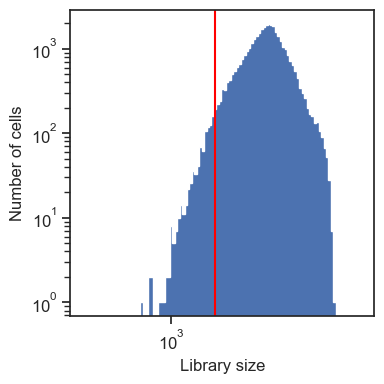

<Axes: xlabel='Library size', ylabel='Number of cells'>

In [82]:
scprep.plot.plot_library_size(matrix, cutoff=1500)

Note: Skipped normalization as data is already log-normalized

In [83]:
adata.layers

Layers with keys: normalized

##### Creating the MAGIC operator
If you don't specify parameters, MAGIC creates an operator with the following default values: knn=5, knn_max = 3 * knn, decay=1, t=3.

In [84]:
magic_op = magic.MAGIC()

##### Running MAGIC with gene selection
The magic_op.fit_transform function takes the normalized data and an array of selected genes as its arguments. If no genes are provided, MAGIC will return a matrix of all genes. The same can be achieved by substituting the array of gene names with genes='all_genes'.

In [85]:
%%time
emt_magic = magic_op.fit_transform(matrix, genes=['Foxf2', 'Foxo1', 'Nos3'])

Calculating MAGIC...
  Running MAGIC on 37069 cells and 14699 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 25.08 seconds.
    Calculating KNN search...
    Calculated KNN search in 109.86 seconds.
    Calculating affinities...
    Calculated affinities in 115.83 seconds.
  Calculated graph and diffusion operator in 251.67 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 252.88 seconds.
CPU times: total: 5min 9s
Wall time: 4min 12s


##### Visualizing gene-gene relationships

We can see gene-gene relationships much more clearly after applying MAGIC. Note that the change in absolute values of gene expression is not meaningful - the relative difference is all that matters.

In [86]:
np.corrcoef(emt_magic[['Foxf2','Foxo1']], rowvar = False)[0][1]

0.38836827084967707

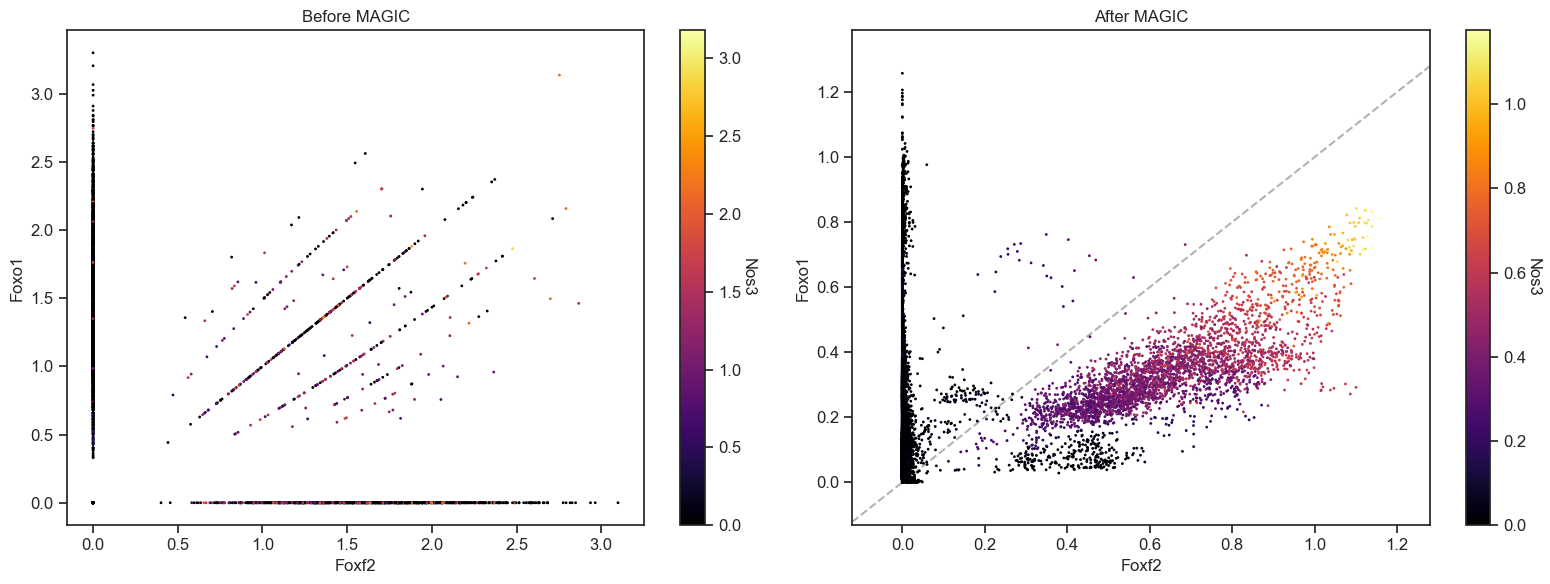

In [87]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

scprep.plot.scatter(x=matrix['Foxf2'], y=matrix['Foxo1'], c=matrix['Nos3'],  ax=ax1,
                    xlabel='Foxf2', ylabel='Foxo1', legend_title="Nos3", title='Before MAGIC')

scprep.plot.scatter(x=emt_magic['Foxf2'], y=emt_magic['Foxo1'], c=emt_magic['Nos3'], ax=ax2,
                    xlabel='Foxf2', ylabel='Foxo1', legend_title="Nos3", title='After MAGIC')
plt.axline((0,0), slope=1, color="black", alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

# Session Info

In [128]:
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.2.0
asciitree                   NA
asttokens                   NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
bottleneck                  1.3.5
cffi                        1.15.1
cloudpickle                 2.0.0
colorama                    0.4.5
cycler                      0.10.0
cython_runtime              NA
dask                        2022.05.0
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
decoupler                   1.1.0
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
fasteners                   0.17.3
fsspec                      2022.3.0
h5py                        3.6.0
hypergeom_ufunc             NA
igraph                      0.9.10
ipykernel                   6.15.2
ipython_genutils            0.2.0
ipywidgets                  7.7.0
jedi    